In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from cpu_stats import Constant as Constant, _get_cpu_model

df = pd.read_excel("./result.xlsx")

S_CPU_MANUFACTURER = "CPU manufacturer"
S_CPU_FULL_NAME = "CPU model long"
S_SCORE = "Score"

df[S_CPU_MANUFACTURER] = df[Constant.CPU_MODEL].apply(lambda x: x.split(" ")[0])

# Filter only Windows
df = df[df["Platform"] == "Windows"]

df[S_CPU_FULL_NAME] = df[Constant.CPU_MODEL]
df[Constant.CPU_MODEL] = df[Constant.CPU_MODEL].apply(_get_cpu_model)


def plot(plot_func, *args, **kwargs):
    _, ax = pyplot.subplots(figsize=(11, 8))
    ax.tick_params(rotation=90)
    kwargs["ax"] = ax
    kwargs["order"] = kwargs["data"].groupby(kwargs["x"])[kwargs["y"]].mean().sort_values().index.values

    ax = plot_func(*args, **kwargs)
    for p in ax.patches:
        ax.annotate(
            "%.0f" % p.get_height(),
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            rotation=90,
            fontsize=11,
            xytext=(0, 20),
            textcoords="offset points",
        )

    ax.legend(loc="upper left")
    ax.set_ylim(0, kwargs["data"][kwargs["y"]].max() * 1.1)


df.head()

,Model,url,CPU model,Single-Core Score,Multi-Core Score,Platform,CPU manufacturer,CPU model long
0,"VMware, Inc. VMware7,1",https://browser.geekbench.com/v5/cpu/14573458,1280P,315,2144,Windows,Intel,Intel Core i7-1280P 1997 MHz (6 cores)
1,Default string Default string,https://browser.geekbench.com/v5/cpu/14663353,1215U,367,622,Windows,Intel,Intel Core i3-1215U 2493 MHz (6 cores)
2,"SAMSUNG ELECTRONICS CO., LTD. 930QED",https://browser.geekbench.com/v5/cpu/14598668,1240P,436,2418,Windows,Intel,Intel Core i5-1240P 2100 MHz (12 cores)
3,"VMware, Inc. VMware7,1",https://browser.geekbench.com/v5/cpu/14494813,1280P,455,3700,Windows,Intel,Intel Core i7-1280P 1997 MHz (8 cores)
4,"VMware, Inc. VMware7,1",https://browser.geekbench.com/v5/cpu/14473064,1280P,459,1612,Windows,Intel,Intel Core i7-1280P 1997 MHz (3 cores)


,CPU model,Platform,CPU manufacturer,count
0,1215U,Windows,Intel,12
1,1235U,Windows,Intel,21
2,1240P,Windows,Intel,170
3,12450H,Windows,Intel,21
4,12500H,Windows,Intel,48


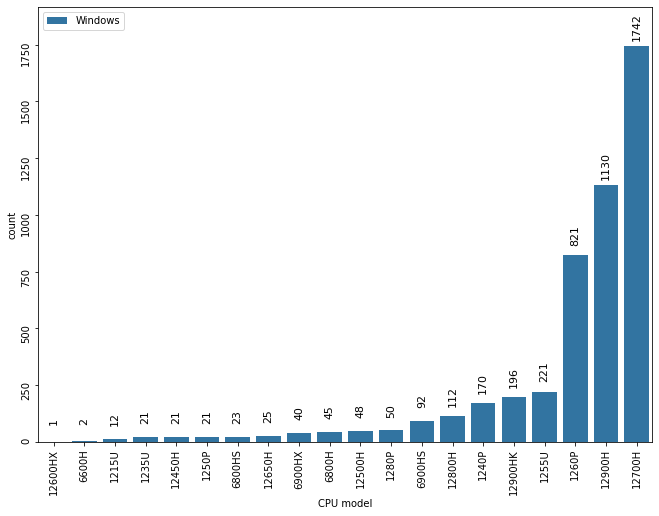

In [2]:
counts = (
    df.groupby([Constant.CPU_MODEL, Constant.PLATFORM, S_CPU_MANUFACTURER])[
        Constant.CPU_MODEL
    ]
    .count()
    .reset_index(name="count")
)
plot(sns.barplot, x=Constant.CPU_MODEL, y="count", hue=Constant.PLATFORM, data=counts)
counts.head()

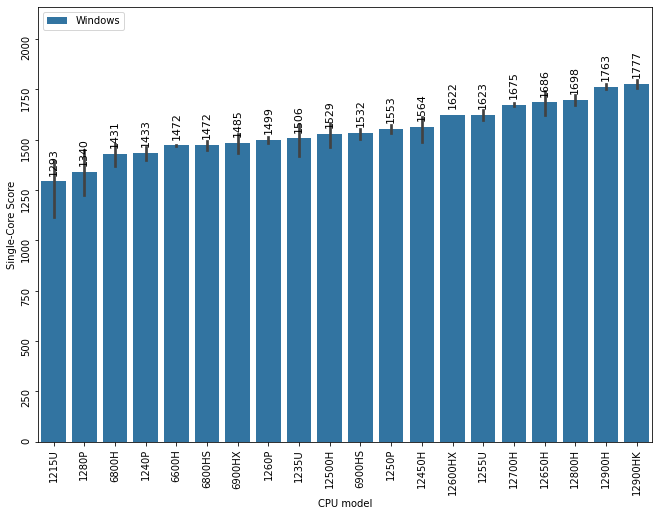

In [3]:
plot(sns.barplot, x=Constant.CPU_MODEL, y=Constant.SINGLE_CORE_SCORE, hue=Constant.PLATFORM, data=df)

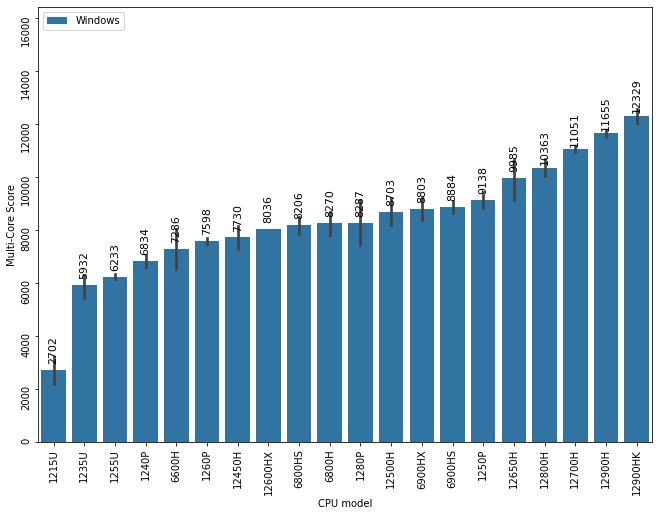

In [4]:
plot(sns.barplot, x=Constant.CPU_MODEL, y=Constant.MULTI_CORE_SCORE, hue=Constant.PLATFORM, data=df)

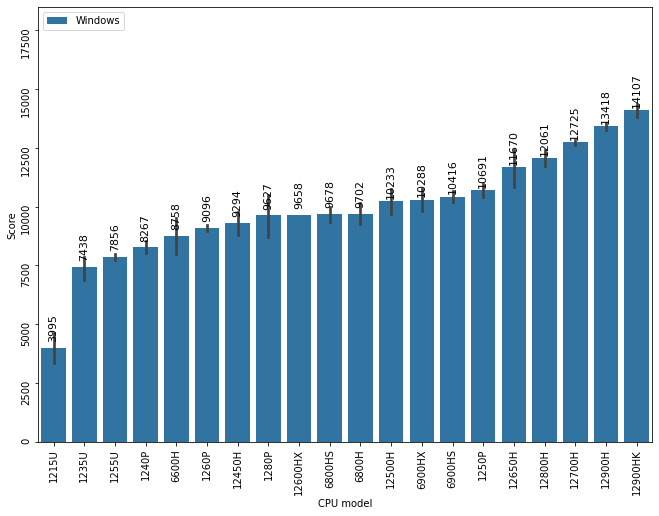

In [6]:
df_win = df[df['Platform'] == 'Windows']
df_win[S_SCORE] = df_win[Constant.MULTI_CORE_SCORE] + df_win[Constant.SINGLE_CORE_SCORE]

plot(sns.barplot, x=Constant.CPU_MODEL, y=S_SCORE, hue=Constant.PLATFORM, data=df_win)